<a href="https://colab.research.google.com/github/Gaurav1401/Innomatics_Internship_APR_21/blob/main/Task%20-%2011%20(EDA%20Missing%20Value%20Outlier%20ML%20Model)/Task_11_Bivariate_Analysis_Encoding_Transformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [226]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [227]:
import warnings as wg
wg.filterwarnings('ignore')

In [228]:
import plotly as py
import cufflinks as cf
from plotly.offline import iplot
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

In [229]:
import plotly.express as px
import plotly.graph_objects as go

In [230]:
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

In [231]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [232]:
from scipy import stats

In [233]:
df_3 = pd.read_csv('df_3.csv')

In [234]:
df_3.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,9th-12th,4,Unmarried,Machine-op-inspct,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,5,Married,Farming-fishing,White,Male,0,0,50,United-States,<=50K
2,28,Government,336951,Assoc-acdm,8,Married,Protective-serv,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,6,Married,Machine-op-inspct,Black,Male,7688,0,40,United-States,>50K
4,34,Private,198693,9th-12th,4,Unmarried,Other-service,White,Male,0,0,30,United-States,<=50K


## native-country vs gender vs age

In [235]:
fig = px.strip(df_3, x="age", y="gender", color="income", facet_col="native-country")
fig.show(renderer="colab")

<font color = blue>**The overall distribution looks the same it doesn't look like income dependso on country and gender**</font>

# Bivariate Analysis

### Correlation b/w numerical features

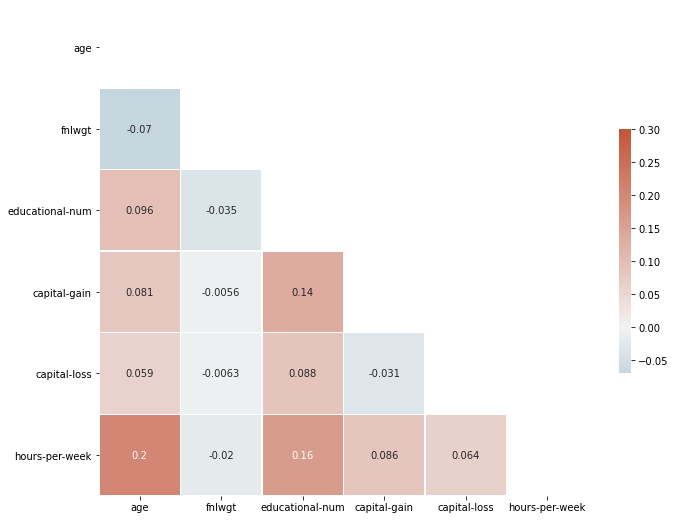

In [236]:
mask = np.triu(np.ones_like(df_3.corr(), dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(df_3.corr(), mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)

plt.show()

<font color = blue>**The correlation between all the features is near to zero not any features are closely correlated**</font>

### Scatterplot b/w two variables

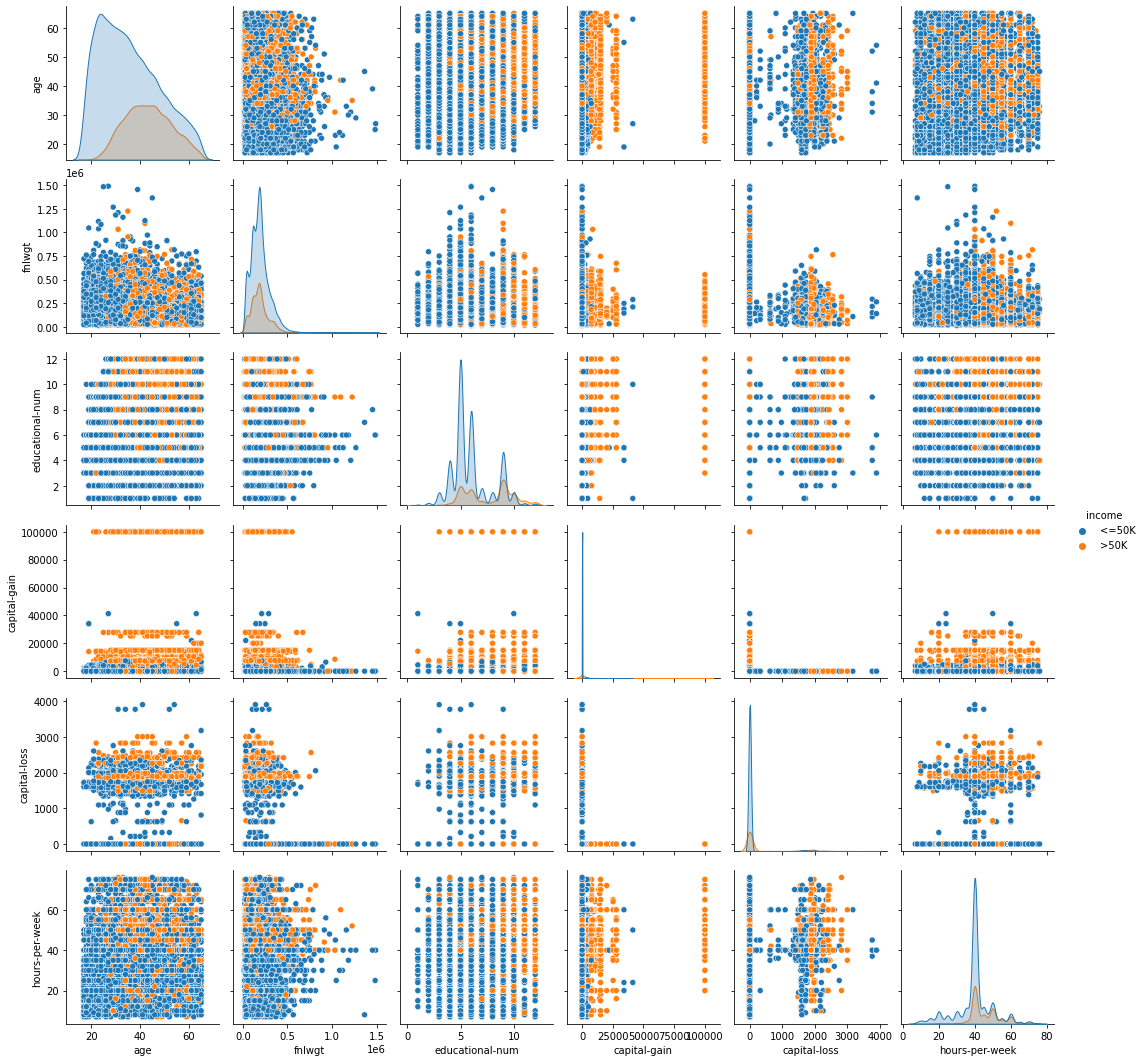

In [237]:
sns.pairplot(df_3, hue = 'income')



*   Majority of the individuals having income more than 50K have higher education.
*   Majority of the individuals earning more than 50K are doing 30 to 55 hour work week approximately.


*   Majority of the individuals earning more than 50K have some extra source of income also.







---

**It doesn't look like fnlwgt decides whether a person would earn less than or more than 50K**

## How income depends on occupation

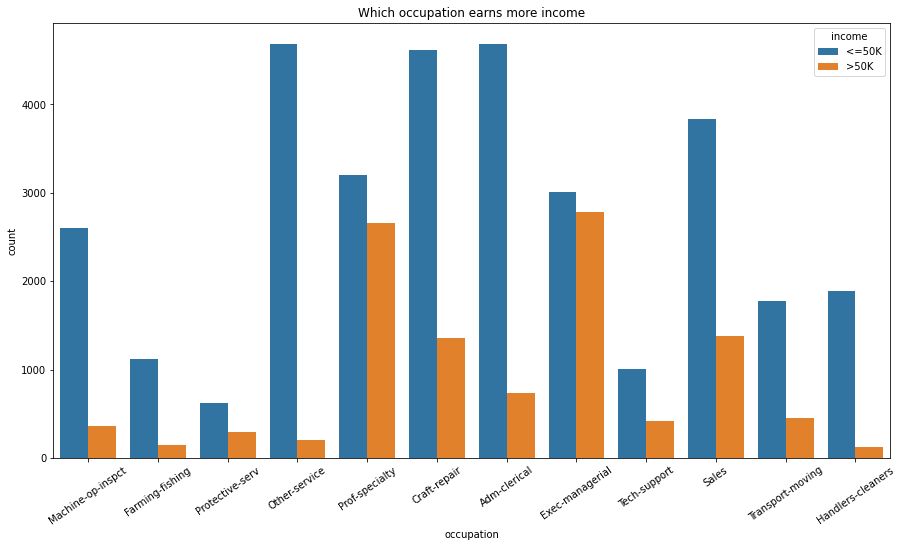

In [238]:
plt.figure(figsize = (15, 8))
sns.countplot('occupation', data = df_3, hue = 'income')
plt.xticks(rotation=35)
plt.title('Which occupation earns more income')
plt.show()

<font color = blue>**We can clearly see that exec-manager and prof-speciality are the occupations which have many number of the people earning more than 50K**</font>

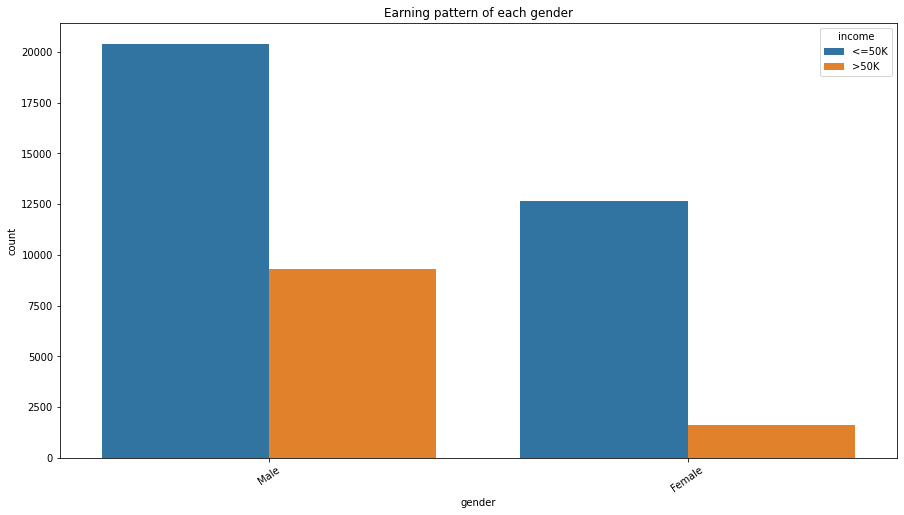

In [239]:
plt.figure(figsize = (15, 8))
sns.countplot('gender', data = df_3, hue = 'income')
plt.xticks(rotation=35)
plt.title('Earning pattern of each gender')
plt.show()

<font color = blue>**Overall in the dataset males are in majority, so there is no doubt that even those earning more than 50K have majority of males**</font>

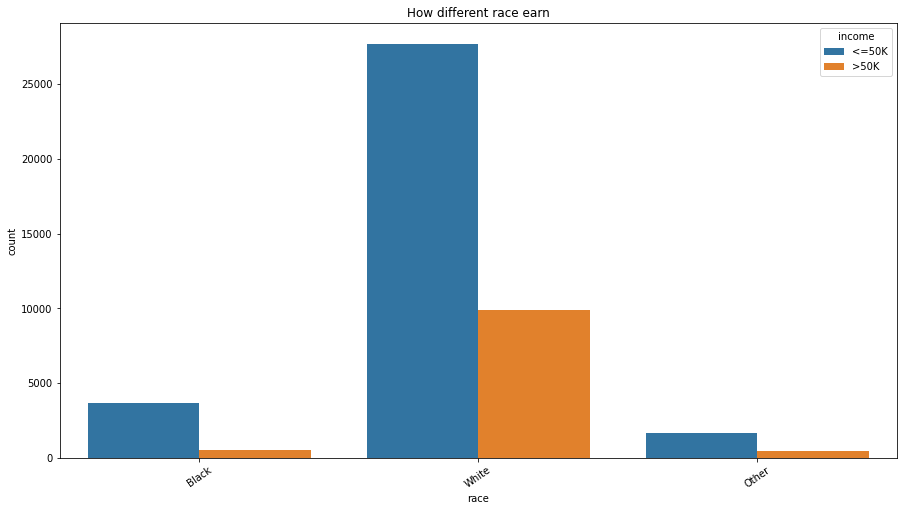

In [240]:
plt.figure(figsize = (15, 8))
sns.countplot('race', data = df_3, hue = 'income')
plt.xticks(rotation=35)
plt.title('How different race earn')
plt.show()

<font color = blue>**Since, majority of the data belongs to white people so this might be the reason why white are earning better**</font>

### How income varies with different country people

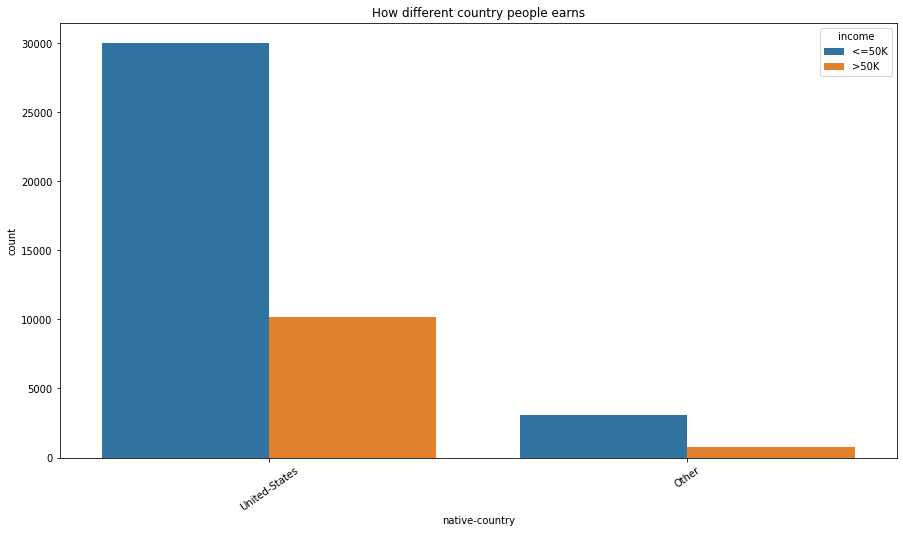

In [241]:
plt.figure(figsize = (15, 8))
sns.countplot('native-country', data = df_3, hue = 'income')
plt.xticks(rotation=35)
plt.title('How different country people earns')
plt.show()

<font color = blue>**Since, there are more individuals from US that's why it is looking like they are earning better**</font>

### How income varies with education

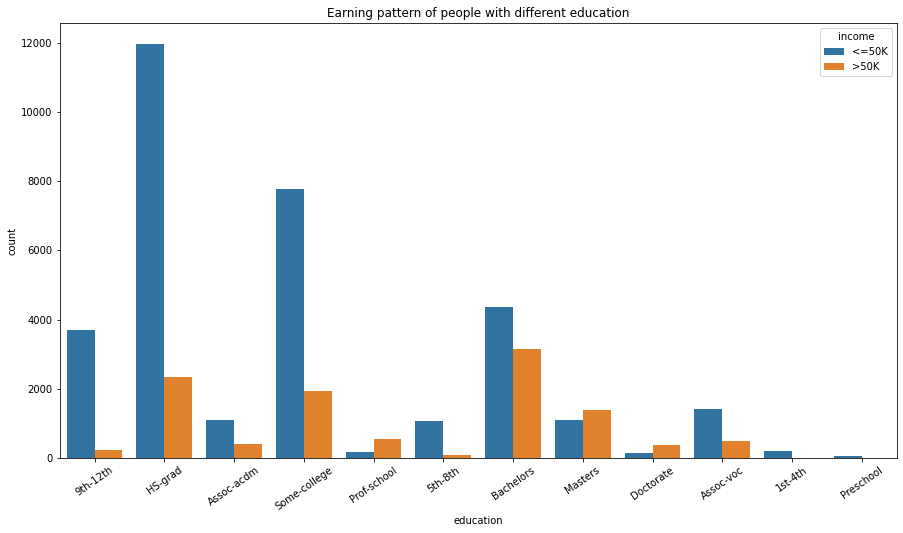

In [242]:
plt.figure(figsize = (15, 8))
sns.countplot('education', data = df_3, hue = 'income')
plt.xticks(rotation=35)
plt.title('Earning pattern of people with different education')
plt.show()



*   Someone from higher education like bachelors,masters or doctrate has more chances to earn more than 50K.
*   Someone having education of 5th-12th has very rare chance to earn more than 50K.


*   Someone having education of Preschool - 4th have the lease chances to earn more than 50K





## education vs occupation vs native-country vs gender vs income

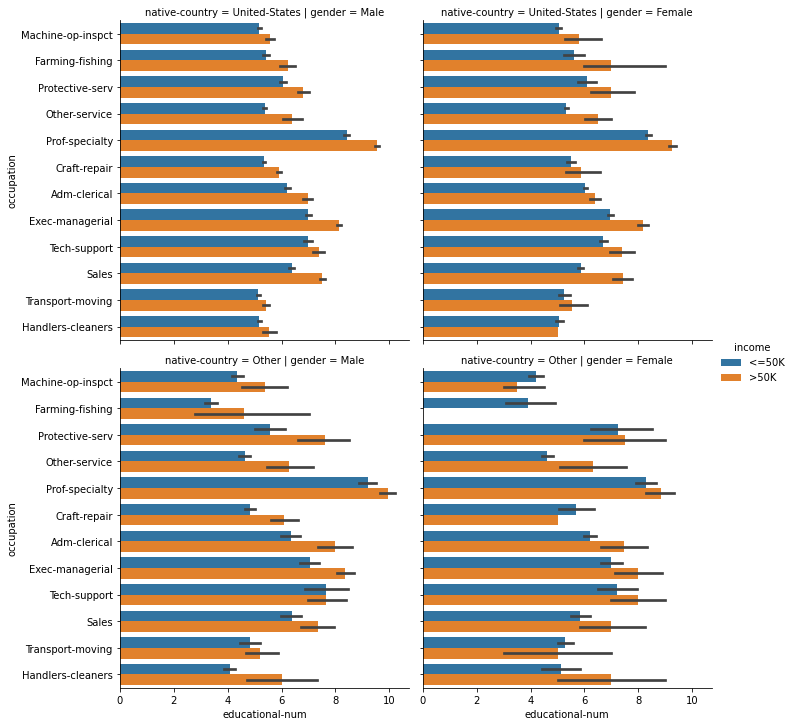

In [243]:
#fig, ax = plt.subplots(1, 2, figsize = [16,16])
sns.catplot(x = 'educational-num', y = 'occupation',kind= 'bar',row = 'native-country',col = 'gender', data = df_3,  hue = 'income', legend_out = True)
plt.show()



*   Irrespective of the gender and native-country, if he/she is working as Prof-speciality or Adm-clerical or Exec-managerial and have higher education, then there are more chances that he or she would earn the income of more than 50K.


*   In transport-moving occupation, if a female is from other country, then she has more chances of getting the income of more than 50K even if she has lesser education than a male from other country in the same occupation.
*   There is a lot more variability in the education of a female from other country getting the income of more than 50K working in sales department. It means a woman from other country might get a better salary even if she is lesser educated in sales occupation.


*   In many of the occupations, female from other country may get the salary of more than 50K even if her education is comparatively lesser than others.

*   No female from other country, is earning more than 50K in fishing-farming.


*   Males from other country have to struggle more than others to get a good salary in the occupation of Machine-op-inspct










## race vs native-country vs education vs occupation vs income

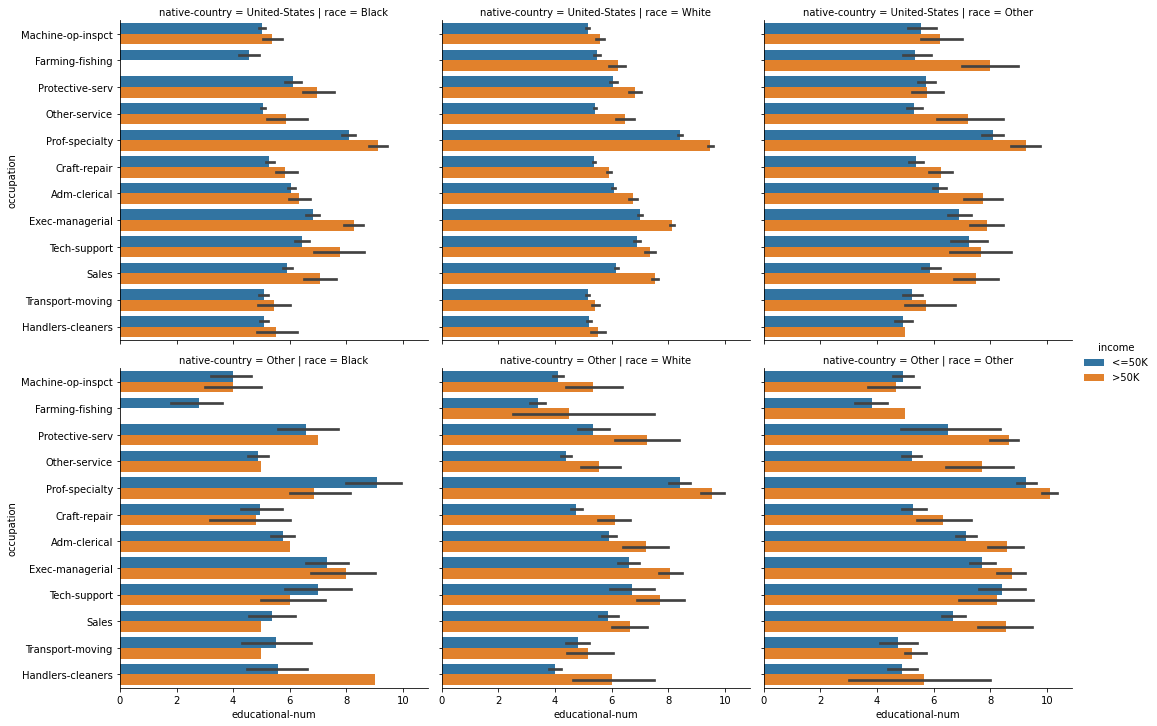

In [244]:
sns.catplot(x = 'educational-num', y = 'occupation',kind= 'bar',row = 'native-country',col = 'race', data = df_3,  hue = 'income', legend_out = True)
sns.despine()
plt.show()



*   In the occupation of farming-fishing blacks are not getting the income of more than 50K whether they are from US or not.

*   Even to get a job of handlers-cleaners, blacks from other country require to be more educated.
*   For a job of Prof-specialty or craft-repair, blacks from other countries don't require to be much educated to get a good salary.



# education vs occupation vs gender vs race vs income

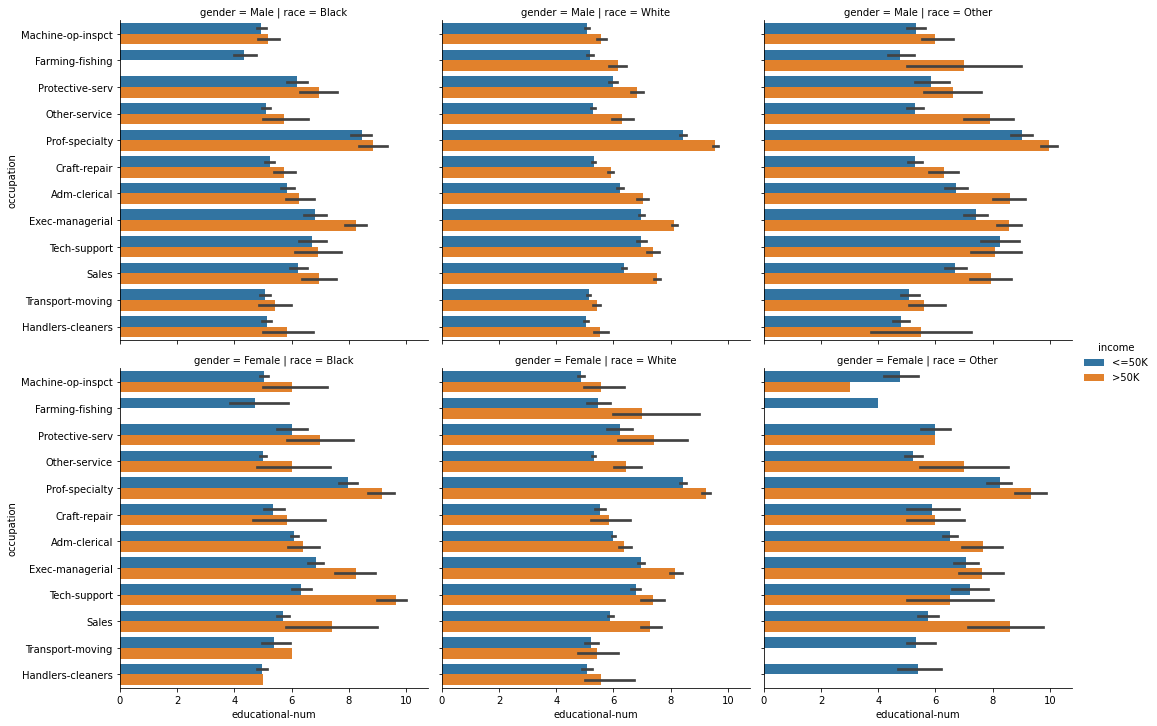

In [245]:
sns.catplot(x = 'educational-num', y = 'occupation',kind= 'bar',row = 'gender',col = 'race', data = df_3,  hue = 'income', legend_out = True)
sns.despine()
plt.show()



*   Females of other race, are not making more income in farming-fishing, transport-moving, handlers-cleaners even after having the relevant education in comparison with others.
*   In Tech support occupation, persons of other race don't require much educations as compare to others to get the income of more than 50K.


*   In other services, people of other race require to bre more educated as compare to other to get the income of more than 50K.




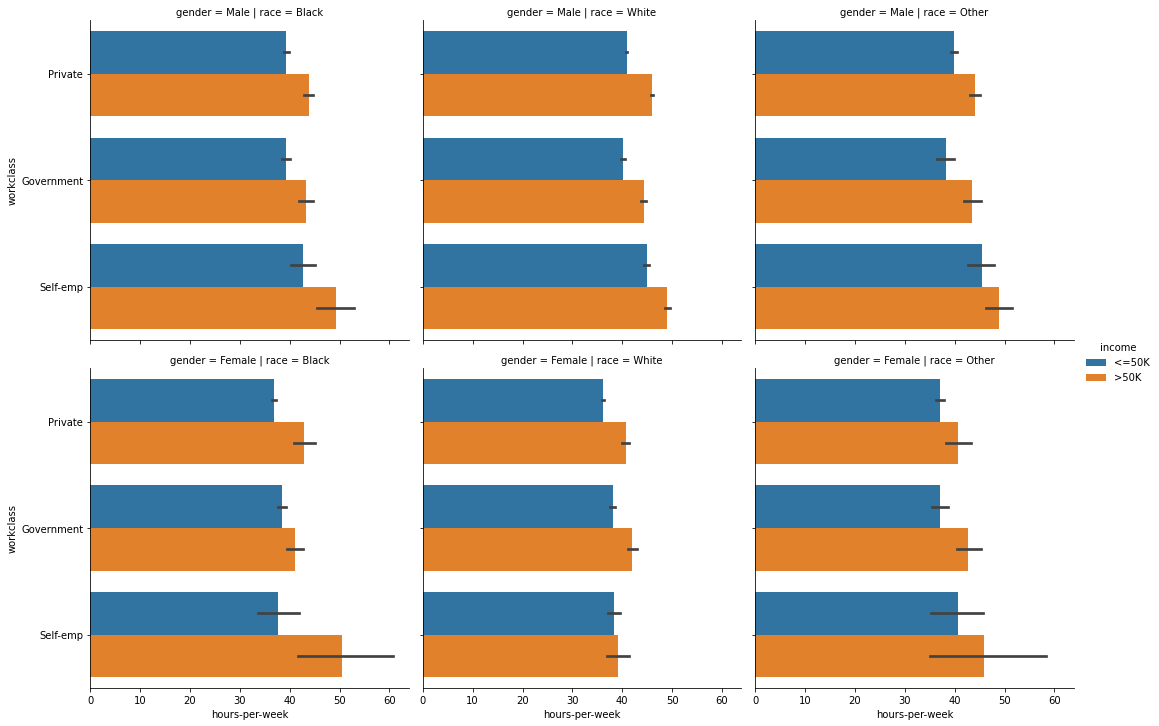

In [246]:
sns.catplot(x = 'hours-per-week', y = 'workclass',kind= 'bar',row = 'gender',col = 'race', data = df_3,  hue = 'income', legend_out = True)
plt.show()



*   If you are not a white female, then as a self employed you will have to work like hell to get the income of more than 50K.



## Remmoving the fnlwgt column

In [247]:
df_3 = df_3.drop('fnlwgt', axis='columns')

# Data Preprocessing for Machine Learning

In [248]:
df_3.columns

Index(['age', 'workclass', 'education', 'educational-num', 'marital-status',
       'occupation', 'race', 'gender', 'capital-gain', 'capital-loss',
       'hours-per-week', 'native-country', 'income'],
      dtype='object')

In [249]:
num = list(df_3.select_dtypes(include=np.number).columns)

In [250]:
num.remove('educational-num')

In [251]:
num

['age', 'capital-gain', 'capital-loss', 'hours-per-week']

In [252]:
df_3[df_3['capital-gain'] > 20000].shape

(306, 13)

In [253]:
df_3.shape

(43982, 13)

In [254]:
df_3 = df_3.drop(df_3[df_3['capital-gain'] > 20000].index)

In [255]:
df_3.shape

(43676, 13)

# Feature Scaling

In [256]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [257]:
for i in num:
  df_3[i] = scaler.fit_transform(df_3[[i]])

In [258]:
df_3.head()

,age,workclass,education,educational-num,marital-status,occupation,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.166667,Private,9th-12th,4,Unmarried,Machine-op-inspct,Black,Male,0.000000,0.0,0.478261,United-States,<=50K
1,0.437500,Private,HS-grad,5,Married,Farming-fishing,White,Male,0.000000,0.0,0.623188,United-States,<=50K
2,0.229167,Government,Assoc-acdm,8,Married,Protective-serv,White,Male,0.000000,0.0,0.478261,United-States,>50K
3,0.562500,Private,Some-college,6,Married,Machine-op-inspct,Black,Male,0.511715,0.0,0.478261,United-States,>50K
4,0.354167,Private,9th-12th,4,Unmarried,Other-service,White,Male,0.000000,0.0,0.333333,United-States,<=50K


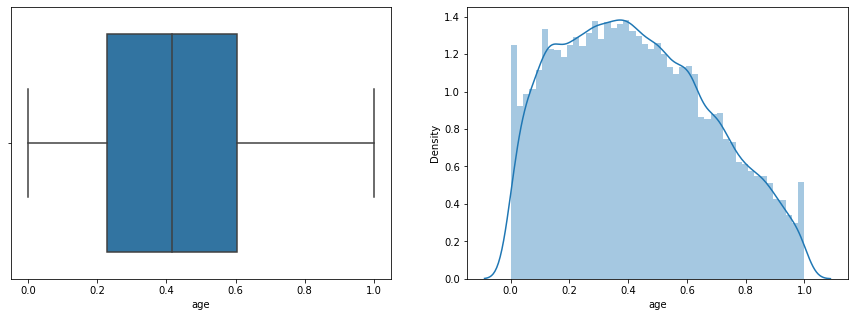

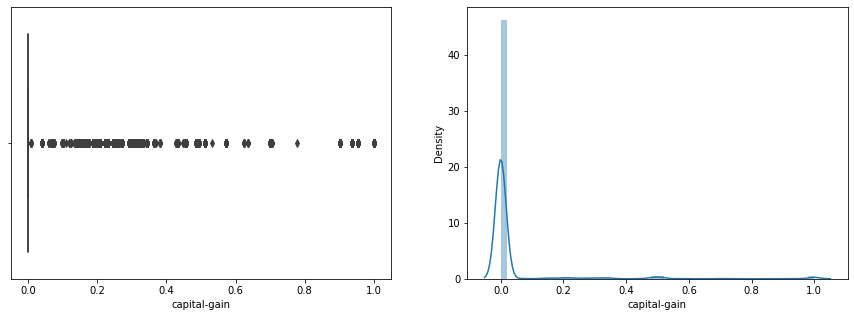

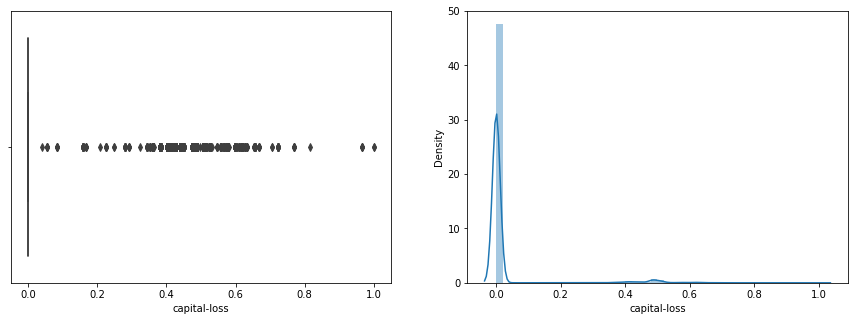

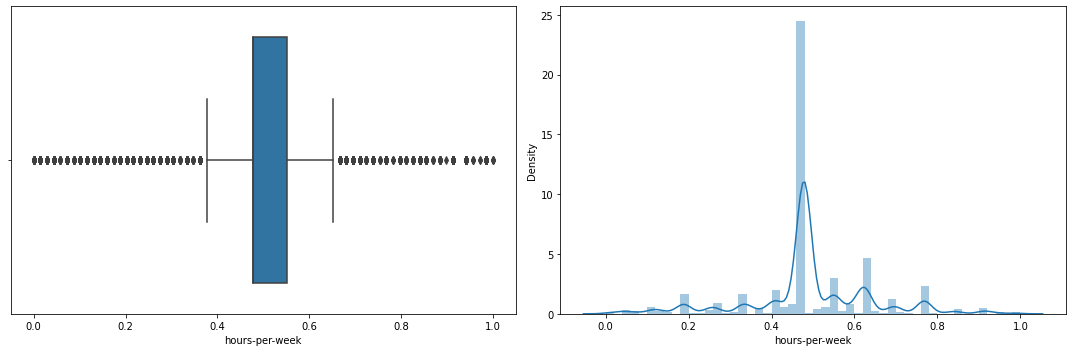

In [259]:
for i in num:
    fig, axes = plt.subplots(ncols=2, figsize=(15, 5))
    sns.boxplot(x = i , data = df_3, ax = axes[0])
    
    sns.distplot(df_3[i],kde = True, ax = axes[1])
    
plt.tight_layout()  
plt.show()

## Checking the normality of each numerical column

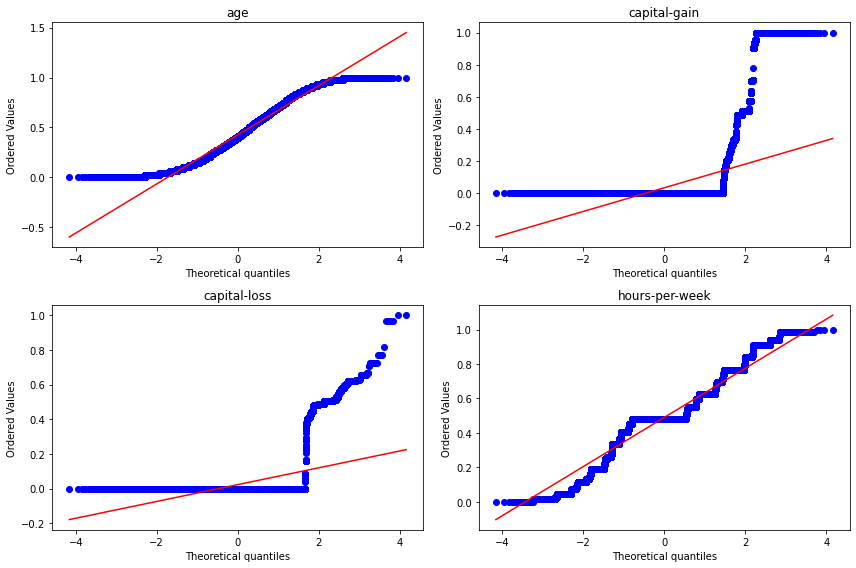

In [260]:
# Initiating a figure
plt.figure(figsize=(12, 8))

# Creating a plot with 1 row and 2 cols

plt.subplot(2, 2, 1)
stats.probplot(df_3[num[0]], dist="norm", plot=plt)
plt.title(num[0])

plt.subplot(2, 2, 2)
stats.probplot(df_3[num[1]], dist="norm", plot=plt)
plt.title(num[1])

plt.subplot(2, 2, 3)
stats.probplot(df_3[num[2]], dist="norm", plot=plt)
plt.title(num[2])

plt.subplot(2, 2, 4)
stats.probplot(df_3[num[3]], dist="norm", plot=plt)
plt.title(num[3])


plt.tight_layout()
plt.show()

## Box-Cox Transformation

<font color = blue>**Many values in capital-loss and capital-gain are 0 so, box-cox can't be applied directly, due to which a constant is required to be added to both the columns**</font>

In [261]:
for i in num:
  df_3[i] += 0.1

In [262]:
for i in num:
  df_3[i+'_box'], l = stats.boxcox(df_3[i])

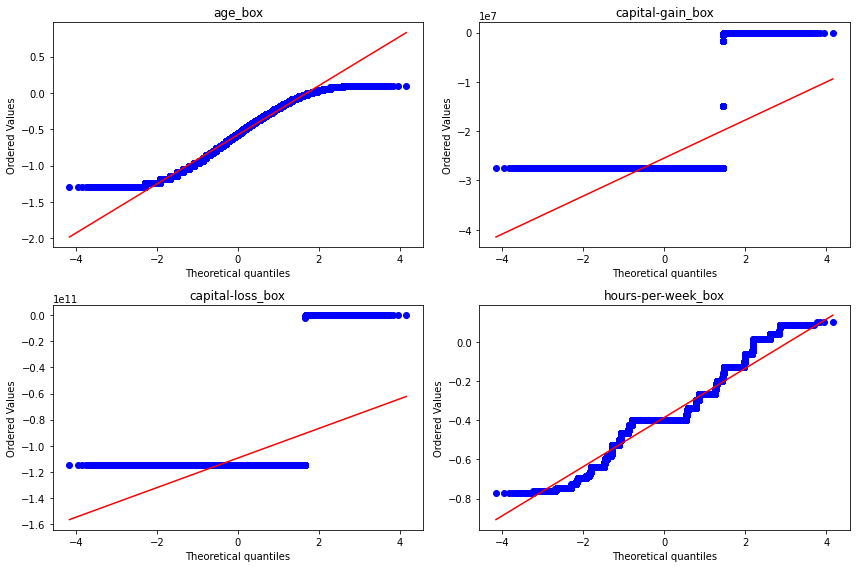

In [263]:
# Initiating a figure
plt.figure(figsize=(12, 8))

# Creating a plot with 2 row and 2 cols

plt.subplot(2, 2, 1)
stats.probplot(df_3[num[0]+'_box'], dist="norm", plot=plt)
plt.title(num[0]+'_box')

plt.subplot(2, 2, 2)
stats.probplot(df_3[num[1]+'_box'], dist="norm", plot=plt)
plt.title(num[1]+'_box')

plt.subplot(2, 2, 3)
stats.probplot(df_3[num[2]+'_box'], dist="norm", plot=plt)
plt.title(num[2]+'_box')

plt.subplot(2, 2, 4)
stats.probplot(df_3[num[3]+'_box'], dist="norm", plot=plt)
plt.title(num[3]+'_box')


plt.tight_layout()
plt.show()

<font color = blue>**Box-Cox is not working let's try log transformation**</font>

## Log Transformation

In [264]:
for i in num:
  df_3[i+'_log'] = np.log(df_3[i])

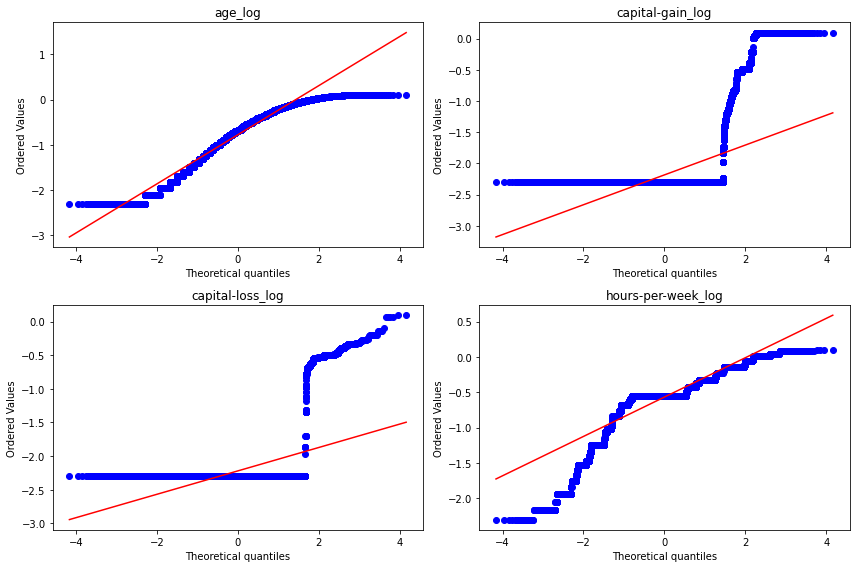

In [265]:
# Initiating a figure
plt.figure(figsize=(12, 8))

# Creating a plot with 2 row and 2 cols

plt.subplot(2, 2, 1)
stats.probplot(df_3[num[0]+'_log'], dist="norm", plot=plt)
plt.title(num[0]+'_log')

plt.subplot(2, 2, 2)
stats.probplot(df_3[num[1]+'_log'], dist="norm", plot=plt)
plt.title(num[1]+'_log')

plt.subplot(2, 2, 3)
stats.probplot(df_3[num[2]+'_log'], dist="norm", plot=plt)
plt.title(num[2]+'_log')

plt.subplot(2, 2, 4)
stats.probplot(df_3[num[3]+'_log'], dist="norm", plot=plt)
plt.title(num[3]+'_log')


plt.tight_layout()
,plt.show()

<font color = blue>**As we can see here, log transformation is not working at all**</font>

## Yeo-Johnson Transformation

In [266]:
from sklearn.preprocessing import PowerTransformer

In [267]:
transformer = PowerTransformer(method = 'yeo-johnson')

for i in num:
  df_3[i+'_yj'] = transformer.fit_transform(df_3[[i]])

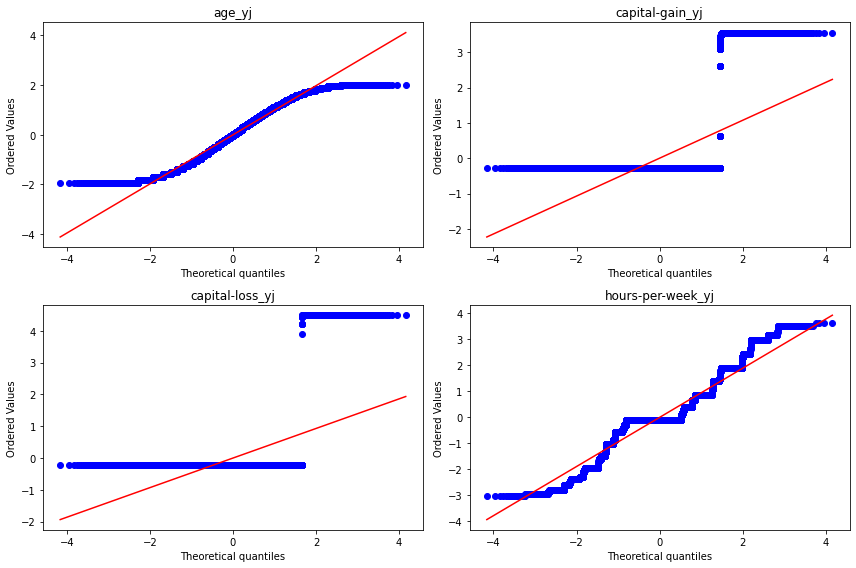

In [268]:
# Initiating a figure
plt.figure(figsize=(12, 8))

# Creating a plot with 2 row and 2 cols

plt.subplot(2, 2, 1)
stats.probplot(df_3[num[0]+'_yj'], dist="norm", plot=plt)
plt.title(num[0]+'_yj')

plt.subplot(2, 2, 2)
stats.probplot(df_3[num[1]+'_yj'], dist="norm", plot=plt)
plt.title(num[1]+'_yj')

plt.subplot(2, 2, 3)
stats.probplot(df_3[num[2]+'_yj'], dist="norm", plot=plt)
plt.title(num[2]+'_yj')

plt.subplot(2, 2, 4)
stats.probplot(df_3[num[3]+'_yj'], dist="norm", plot=plt)
plt.title(num[3]+'_yj')


plt.tight_layout()
plt.show()

<font color = blue>**All transformations are producing almost the similar results so I am creating 2 different dataframes with and without box-cox**</font>

In [269]:
df_3['educational-num'] = scaler.fit_transform(df_3[['educational-num']])

In [270]:
cat = list(df_3.select_dtypes(include = 'object').columns)

In [271]:
cat.remove('education')

In [272]:
cat

['workclass',
 'marital-status',
 'occupation',
 'race',
 'gender',
 'native-country',
 'income']

**Dropping the other transformation columns**

In [273]:
df_4 = df_3.drop([num[0]+'_log',num[1]+'_log',num[2]+'_log',num[3]+'_log',
                  num[0]+'_yj',num[1]+'_yj',num[2]+'_yj',num[3]+'_yj'], axis='columns')

In [274]:
df_4.shape

(43676, 17)

In [275]:
df_4.columns

Index(['age', 'workclass', 'education', 'educational-num', 'marital-status',
       'occupation', 'race', 'gender', 'capital-gain', 'capital-loss',
       'hours-per-week', 'native-country', 'income', 'age_box',
       'capital-gain_box', 'capital-loss_box', 'hours-per-week_box'],
      dtype='object')

# Encoding

<font color = blue>**Since, we already have the numerical eduivalent of education with name educational-num so that column is not required**</font>

In [276]:
df_4 = df_4.drop('education', axis = 'columns')

In [277]:
for i in cat:
  print(i,'has',len(df_4[i].unique()), 'unique values')

workclass has 3 unique values
marital-status has 5 unique values
occupation has 12 unique values
race has 3 unique values
gender has 2 unique values
native-country has 2 unique values
income has 2 unique values


**Label Encoding Gender**

In [278]:
df_4['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [279]:
df_4['gender'] = df_4['gender'].replace(['Male', 'Female'], [1, 0]) # label encoding the categorical variables

**Label Encoding native-country**

In [280]:
df_4['native-country'].unique()

array(['United-States', 'Other'], dtype=object)

In [281]:
df_4['native-country'] = df_4['native-country'].replace(['United-States', 'Other'], [1, 0]) # label encoding the categorical variables

**Label Encoding income**

In [282]:
df_4['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [283]:
df_4['income'] = df_4['income'].replace(['<=50K', '>50K'], [0, 1]) # label encoding the categorical variables

# Dummy Encoding

In [284]:
dummy = pd.get_dummies(df_4[['workclass', 'marital-status', 'occupation', 'race']], drop_first=True)

In [285]:
dummy.shape

(43676, 19)

In [286]:
dummy.columns

Index(['workclass_Private', 'workclass_Self-emp', 'marital-status_Married',
       'marital-status_Separated', 'marital-status_Unmarried',
       'marital-status_Widowed', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
       'occupation_Other-service', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tech-support', 'occupation_Transport-moving', 'race_Other',
       'race_White'],
      dtype='object')

<font color = blue>**From here I am creating two separate dataframes for orignial numerical encoded data and other with box-cox tranformed encoded data**</font>

In [287]:
df_4.columns

Index(['age', 'workclass', 'educational-num', 'marital-status', 'occupation',
       'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week',
       'native-country', 'income', 'age_box', 'capital-gain_box',
       'capital-loss_box', 'hours-per-week_box'],
      dtype='object')

**Deleting the columns of object datatype**

In [288]:
num

['age', 'capital-gain', 'capital-loss', 'hours-per-week']

In [289]:
df_4 = df_4.drop(['marital-status', 'occupation',
       'race', 'workclass'], axis = 'columns')

In [290]:
original_df = df_4[['age','capital-gain', 'capital-loss', 'hours-per-week', 'educational-num', 'native-country','gender','income']]
box_df = df_4[['age_box', 'capital-gain_box', 'capital-loss_box', 'hours-per-week_box', 'educational-num', 'native-country','gender','income']]

**Concatinating new dataframes with dummy encoded variables**

In [291]:
original_df = pd.concat([original_df, dummy], axis = 'columns')
box_df = pd.concat([box_df, dummy], axis = 'columns')

In [292]:
original_df.shape

(43676, 27)

In [293]:
box_df.shape

(43676, 27)

<font color = blue>**Now here, i have prepared my dataset to make a ML model**</font>

**Converting these datasets to csv for ML separately**

In [294]:
from google.colab import files
original_df.to_csv('original_df.csv', index = False)         
files.download('original_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [295]:
box_df.to_csv('box_df.csv', index = False)         
files.download('box_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>